# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**
Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [2]:
# Load Indonesian emotion dataset
url = 'https://raw.githubusercontent.com/MutiaraNurBalqis/Clustering-And-Classification/refs/heads/main/data_clustered.csv'
df = pd.read_csv(url)
X = df.drop(columns=('Target'))
Y = df['Target']


In [3]:
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,4


In [4]:
id_cols = ['TransactionID','AccountID','DeviceID','IPAddress','MerchantID']
df = df.drop(columns=[c for c in id_cols if c in df.columns], errors='ignore')
df.head()

,TransactionAmount,TransactionDate,TransactionType,Location,IP Address,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,Target
0,14.09,2023-04-11 16:29:14,Debit,San Diego,162.198.218.92,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08,0
1,376.24,2023-06-27 16:44:19,Debit,Houston,13.149.61.4,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35,3
2,126.29,2023-07-10 18:16:08,Debit,Mesa,215.97.143.157,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04,2
3,184.50,2023-05-05 16:32:11,Debit,Raleigh,200.13.225.150,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06,2
4,13.45,2023-10-16 17:51:24,Credit,Atlanta,65.164.3.100,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39,4


In [5]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2378 non-null   object 
 1   AccountID                2383 non-null   object 
 2   TransactionAmount        2377 non-null   float64
 3   TransactionDate          2377 non-null   object 
 4   TransactionType          2373 non-null   object 
 5   Location                 2375 non-null   object 
 6   DeviceID                 2375 non-null   object 
 7   IP Address               2383 non-null   object 
 8   MerchantID               2381 non-null   object 
 9   Channel                  2378 non-null   object 
 10  CustomerAge              2386 non-null   float64
 11  CustomerOccupation       2380 non-null   object 
 12  TransactionDuration      2381 non-null   float64
 13  LoginAttempts            2383 non-null   float64
 14  AccountBalance          

In [6]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 2403 entries, 0 to 2402
Series name: Target
Non-Null Count  Dtype
--------------  -----
2403 non-null   int64
dtypes: int64(1)
memory usage: 18.9 KB


# **3. Data Splitting**
Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [7]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# --- 1. Tentukan fitur yang akan digunakan ---
keep_columns = ['TransactionAmount', 'CustomerOccupation', 'Channel', 'CustomerAge']
X = df[keep_columns].copy()
Y = df['Target']  # pastikan ini sesuai nama kolom target kamu

# --- 2. Pisahkan kolom numerik & kategorikal ---
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = X.select_dtypes(include='object').columns

# --- 3. Normalisasi kolom numerik ---
scaler = MinMaxScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# --- 4. Encoding kolom kategorikal ---
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

# --- 5. Split data menjadi train & test ---
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# --- 6. Cek hasil ---
print(f"Training set shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Test set shape: X_test={X_test.shape}, y_test={y_test.shape}")


Training set shape: X_train=(1922, 4), y_train=(1922,)
Test set shape: X_test=(481, 4), y_test=(481,)


In [8]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2403 entries, 0 to 2402
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   TransactionAmount   2377 non-null   float64
 1   CustomerOccupation  2403 non-null   int64  
 2   Channel             2403 non-null   int64  
 3   CustomerAge         2386 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 75.2 KB


# **4. Membangun Model Klasifikasi**
Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Menggunakan algoritma klasifikasi yaitu Decision Tree.
2. Latih model menggunakan data yang sudah dipisah.

In [9]:
dt = DecisionTreeClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [10]:
# Menyimpan Model
import joblib
joblib.dump(dt, 'decision_tree_model.h5')

['decision_tree_model.h5']

# **5. Memenuhi Kriteria Skilled dan Advanced dalam Membangun Model Klasifikasi**



**Biarkan kosong jika tidak menerapkan kriteria skilled atau advanced**

In [11]:
rf = RandomForestClassifier().fit(X_train, y_train)

print("Model training selesai.")

Model training selesai.


In [12]:
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    results = {
        'Confusion Matrix': cm,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, average='weighted', zero_division=1),
        'Recall': recall_score(y_test, y_pred, average='weighted', zero_division=1),
        'F1-Score': f1_score(y_test, y_pred, average='weighted')
    }
    return results

# Update your model evaluation results dictionary
results = {
    'Decision Tree (DT)': evaluate_model(dt, X_test, y_test),
    'Random Forest (RF)': evaluate_model(rf, X_test, y_test),
    }

# Summarize the results in a DataFrame
summary_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)

# Print the summary DataFrame
summary_df

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT),0.162162,0.163943,0.162162,0.162067
1,Random Forest (RF),0.139293,0.140015,0.139293,0.139380


In [13]:
# Menyimpan Model
import joblib
joblib.dump(rf, 'random_forest_model.h5')

['random_forest_model.h5']

Hyperparameter Tuning Model

Pilih salah satu algoritma yang ingin Anda tuning

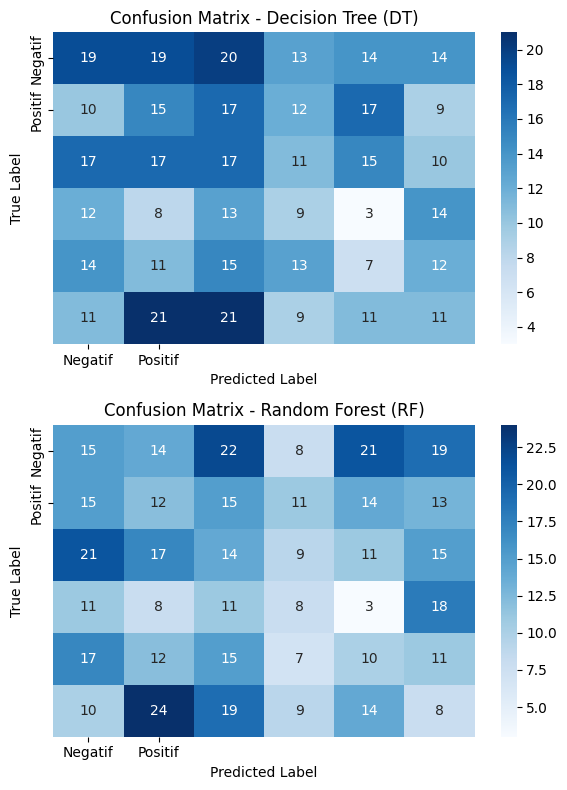

In [14]:
num_models = len(results)
fig, axes = plt.subplots(nrows=num_models, figsize=(6, 4 * num_models))

# Pastikan axes berbentuk list jika hanya ada satu model
if num_models == 1:
    axes = [axes]

for ax, (model_name, metrics) in zip(axes, results.items()):
    cm = metrics['Confusion Matrix']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negatif', 'Positif'], yticklabels=['Negatif', 'Positif'], ax=ax)

    ax.set_title(f'Confusion Matrix - {model_name}')
    ax.set_xlabel("Predicted Label")
    ax.set_ylabel("True Label")

plt.tight_layout()
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Definisikan parameter grid untuk tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Inisialisasi model dasar
rf_base = RandomForestClassifier(random_state=42)

# Gunakan GridSearchCV untuk mencari kombinasi parameter terbaik
rf_grid = GridSearchCV(
    estimator=rf_base,
    param_grid=param_grid,
    cv=5,                # 5-fold cross-validation
    n_jobs=-1,           # Gunakan semua core CPU
    verbose=2,
    scoring='f1_weighted'  # Fokus ke F1-Score tertimbang
)

# Jalankan grid search
rf_grid.fit(X_train, y_train)

# Ambil model terbaik
rf_best = rf_grid.best_estimator_

# Tampilkan parameter terbaik
print("🔍 Parameter terbaik Random Forest:")
print(rf_grid.best_params_)

# Evaluasi model hasil tuning
tuned_rf_results = evaluate_model(rf_best, X_test, y_test)

print("\n📊 Evaluasi Model Random Forest (Tuning):")
for metric, value in tuned_rf_results.items():
    if metric != 'Confusion Matrix':
        print(f"{metric}: {value:.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
🔍 Parameter terbaik Random Forest:
{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

📊 Evaluasi Model Random Forest (Tuning):
Accuracy: 0.1414
Precision: 0.1440
Recall: 0.1414
F1-Score: 0.1410


In [16]:
results['Random Forest (Tuned)'] = tuned_rf_results

# Update summary DataFrame
rows = []
for model_name, metrics in results.items():
    rows.append({
        'Model': model_name,
        'Accuracy': metrics['Accuracy'],
        'Precision': metrics['Precision'],
        'Recall': metrics['Recall'],
        'F1-Score': metrics['F1-Score']
    })

summary_df = pd.DataFrame(rows)
display(summary_df.round(4))

,Model,Accuracy,Precision,Recall,F1-Score
0,Decision Tree (DT),0.1622,0.1639,0.1622,0.1621
1,Random Forest (RF),0.1393,0.1400,0.1393,0.1394
2,Random Forest (Tuned),0.1414,0.1440,0.1414,0.1410


In [17]:
# Menyimpan Model
import joblib
joblib.dump(rf_base, 'Random_Forest(Tuned).h5')

['Random_Forest(Tuned).h5']

End of Code